# Dataset Download and extraction

In [ ]:
!wget "https://thor.robots.ox.ac.uk/pets/images.tar.gz"
!wget "https://thor.robots.ox.ac.uk/pets/annotations.tar.gz"

In [2]:
!mkdir dataset
!mkdir annotations

mkdir: cannot create directory ‘annotations’: File exists


In [3]:
!tar -xzf "/content/images.tar.gz" -C "/content/"
!tar -xzf "/content/annotations.tar.gz" -C "/content/"


# Some EDA

### Let's get a bit closer to our data

In [4]:
import os
dataset_path = '/content/'
os.chdir(dataset_path)

In [5]:
import os

# List files in the dataset directory
files = os.listdir(dataset_path)
images_path = os.path.join(dataset_path, 'images/')
ann_path = os.path.join(dataset_path, 'annotations/')
print("Images directory:", images_path)

# Check the number of images
image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]
print("Number of images:", len(image_files))


Images directory: /content/images/
Number of images: 7390


### Samples of images

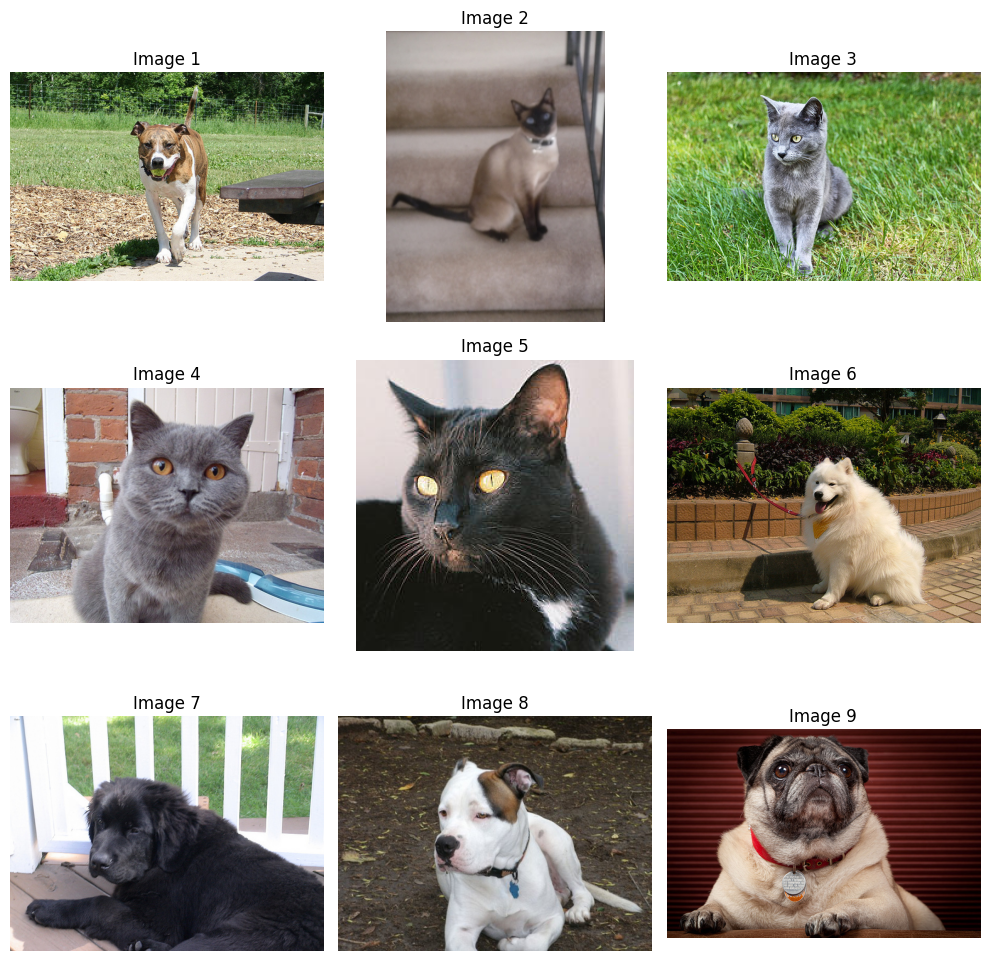

In [6]:
import matplotlib.pyplot as plt
import cv2

# Display a grid of sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    image_path = os.path.join(images_path, image_files[i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(f"Image {i + 1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

# Extract breed names from filenames
breeds = [filename.split('_')[0] for filename in image_files]

# Create a DataFrame for analysis
df = pd.DataFrame({'filename': image_files, 'breed': breeds})

# Count the number of images per breed
breed_counts = df['breed'].value_counts()
print(breed_counts)

breed
american         400
english          400
chihuahua        200
Maine            200
Bengal           200
wheaten          200
Ragdoll          200
havanese         200
pomeranian       200
miniature        200
Abyssinian       200
keeshond         200
Persian          200
leonberger       200
great            200
boxer            200
basset           200
Egyptian         200
Siamese          200
yorkshire        200
Russian          200
British          200
Bombay           200
samoyed          200
newfoundland     200
pug              200
german           200
japanese         200
Sphynx           200
beagle           200
Birman           200
saint            200
shiba            200
scottish         199
staffordshire    191
Name: count, dtype: int64


### The list.txt file has image_path,class_id, breed id

In [8]:
import pandas as pd

# Load the metadata file
metadata_path = '/content/annotations/list.txt'  # Update with the correct path
metadata = []

with open(metadata_path, 'r') as file:
    for line in file:
        if not line.startswith('#'):  # Skip comment lines
            parts = line.strip().split()
            if len(parts) == 4:  # Ensure the line has the expected format
                filename = parts[0]
                class_id = int(parts[1])
                species = int(parts[2])
                breed_id = int(parts[3])

                # Extract breed name from filename
                # Breed name is everything before the last underscore
                breed_name = '_'.join(filename.split('_')[:-1])

                metadata.append({
                    'filename': filename,
                    'class_id': class_id,
                    'species': species,
                    'breed_id': breed_id,
                    'breed_name': breed_name
                })

# Create a DataFrame
df = pd.DataFrame(metadata)
print(df.tail())

                  filename  class_id  species  breed_id         breed_name
7344  yorkshire_terrier_96        37        2        25  yorkshire_terrier
7345  yorkshire_terrier_97        37        2        25  yorkshire_terrier
7346  yorkshire_terrier_98        37        2        25  yorkshire_terrier
7347  yorkshire_terrier_99        37        2        25  yorkshire_terrier
7348   yorkshire_terrier_9        37        2        25  yorkshire_terrier


In [9]:
# Define species mapping
species_map = {1: 'Cat', 2: 'Dog'}

# Add species names to the DataFrame
df['species_name'] = df['species'].map(species_map)
print(df.head())

         filename  class_id  species  breed_id  breed_name species_name
0  Abyssinian_100         1        1         1  Abyssinian          Cat
1  Abyssinian_101         1        1         1  Abyssinian          Cat
2  Abyssinian_102         1        1         1  Abyssinian          Cat
3  Abyssinian_103         1        1         1  Abyssinian          Cat
4  Abyssinian_104         1        1         1  Abyssinian          Cat


In [10]:
unique_breeds = df['breed_name'].unique()
print("Unique breed names:")
print(unique_breeds)

Unique breed names:
['Abyssinian' 'american_bulldog' 'american_pit_bull_terrier'
 'basset_hound' 'beagle' 'Bengal' 'Birman' 'Bombay' 'boxer'
 'British_Shorthair' 'chihuahua' 'Egyptian_Mau' 'english_cocker_spaniel'
 'english_setter' 'german_shorthaired' 'great_pyrenees' 'havanese'
 'japanese_chin' 'keeshond' 'leonberger' 'Maine_Coon' 'miniature_pinscher'
 'newfoundland' 'Persian' 'pomeranian' 'pug' 'Ragdoll' 'Russian_Blue'
 'saint_bernard' 'samoyed' 'scottish_terrier' 'shiba_inu' 'Siamese'
 'Sphynx' 'staffordshire_bull_terrier' 'wheaten_terrier'
 'yorkshire_terrier']


In [11]:
# Count images per species
species_counts = df['species_name'].value_counts()
print("Species Distribution:")
print(species_counts)

# Count images per breed
breed_counts = df['breed_name'].value_counts()
print("\nBreed Distribution:")
print(breed_counts)

Species Distribution:
species_name
Dog    4978
Cat    2371
Name: count, dtype: int64

Breed Distribution:
breed_name
yorkshire_terrier             200
samoyed                       200
Russian_Blue                  200
Ragdoll                       200
pug                           200
pomeranian                    200
Persian                       200
miniature_pinscher            200
Maine_Coon                    200
leonberger                    200
american_bulldog              200
japanese_chin                 200
havanese                      200
great_pyrenees                200
german_shorthaired            200
english_setter                200
shiba_inu                     200
chihuahua                     200
British_Shorthair             200
Sphynx                        200
wheaten_terrier               200
Birman                        200
Bengal                        200
beagle                        200
basset_hound                  200
american_pit_bull_terrier     200

<ipython-input-12-1297691da0a1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='species_name', palette='viridis')


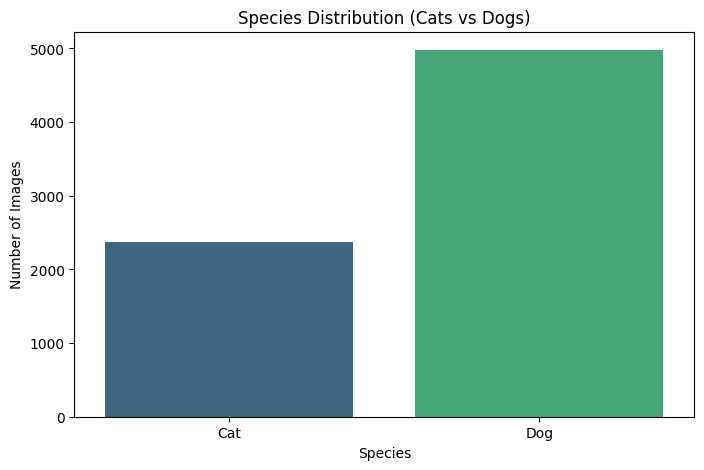

<ipython-input-12-1297691da0a1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_breed_counts.index, y=cat_breed_counts.values, palette='viridis')


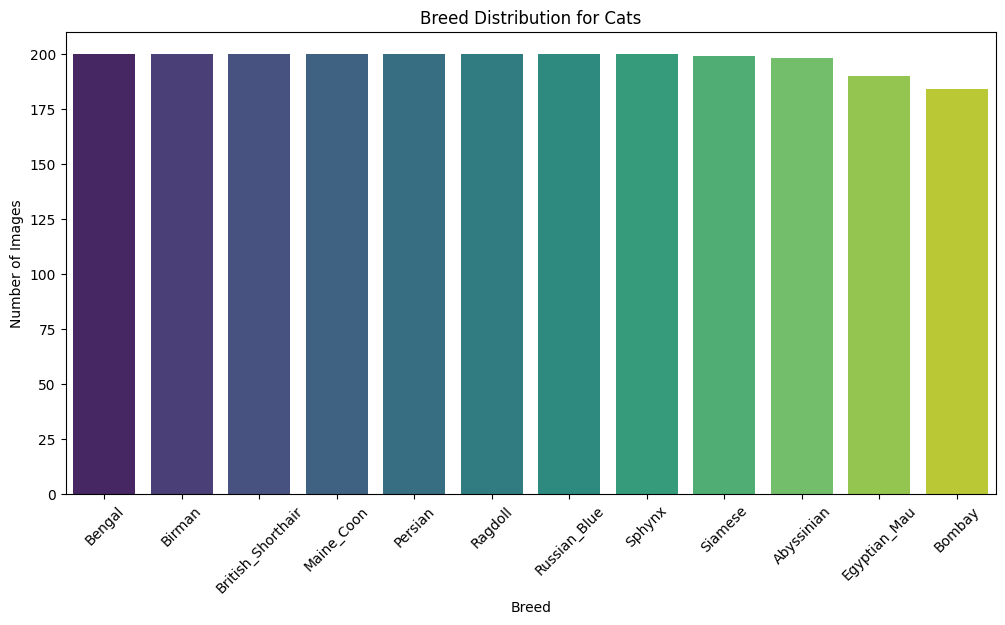

<ipython-input-12-1297691da0a1>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dog_breed_counts.index, y=dog_breed_counts.values, palette='viridis')


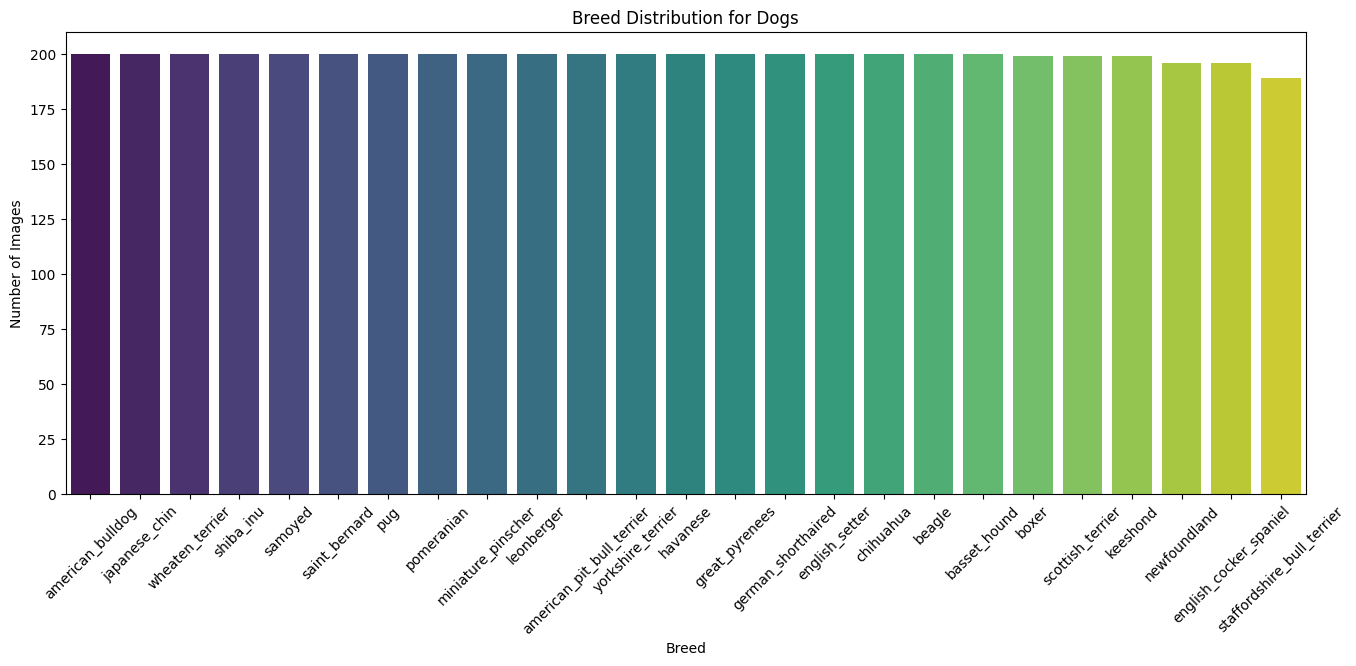

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot species distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='species_name', palette='viridis')
plt.title("Species Distribution (Cats vs Dogs)")
plt.xlabel("Species")
plt.ylabel("Number of Images")
plt.show()

# Plot breed distribution for cats
cat_breeds_df = df[df['species_name'] == 'Cat']
cat_breed_counts = cat_breeds_df['breed_name'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=cat_breed_counts.index, y=cat_breed_counts.values, palette='viridis')
plt.title("Breed Distribution for Cats")
plt.xlabel("Breed")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

# Plot breed distribution for dogs
dog_breeds_df = df[df['species_name'] == 'Dog']
dog_breed_counts = dog_breeds_df['breed_name'].value_counts()
plt.figure(figsize=(16, 6))
sns.barplot(x=dog_breed_counts.index, y=dog_breed_counts.values, palette='viridis')
plt.title("Breed Distribution for Dogs")
plt.xlabel("Breed")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

## Checking the image sizes

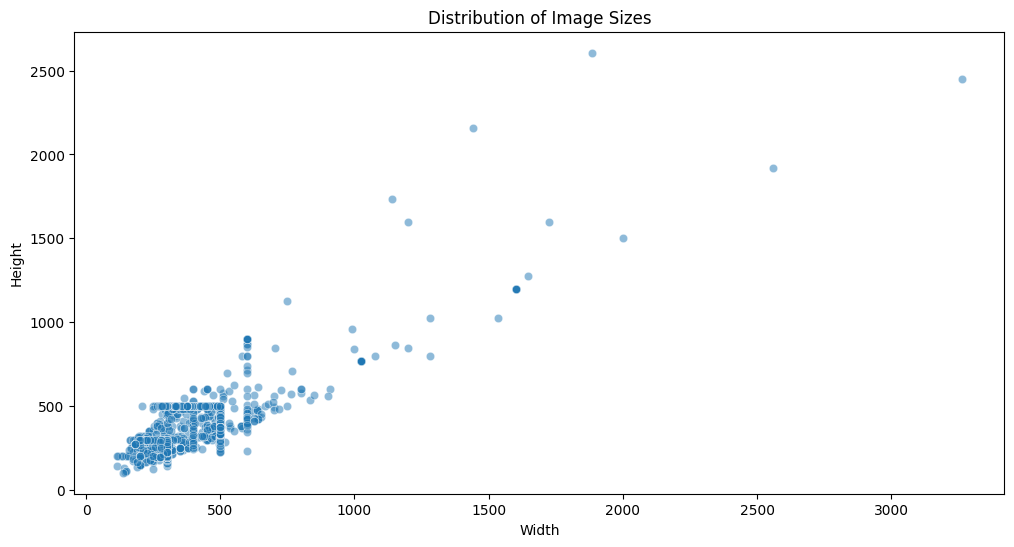

In [13]:
from PIL import Image

# Get image dimensions
image_sizes = []
for filename in df['filename']:
    image_path = os.path.join(images_path, filename + '.jpg')  # Assuming images are in .jpg format
    with Image.open(image_path) as img:
        width, height = img.size
        image_sizes.append((width, height))

# Create a DataFrame for image sizes
size_df = pd.DataFrame(image_sizes, columns=['width', 'height'])

# Plot the distribution of image sizes
plt.figure(figsize=(12, 6))
sns.scatterplot(data=size_df, x='width', y='height', alpha=0.5)
plt.title("Distribution of Image Sizes")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

In [14]:
# Check for corrupted or missing images
corrupted_images = []
for filename in df['filename']:
    image_path = os.path.join(images_path, filename + '.jpg')  # Assuming images are in .jpg format
    try:
        img = Image.open(image_path)
        img.verify()  # Verify that the image is not corrupted
    except Exception as e:
        corrupted_images.append(filename)

print("Corrupted or missing images:", corrupted_images)

Corrupted or missing images: []
